### Notebook for processing Le Haute Wind Farm Data

Data is collected from [ENGIE Open Data](https://opendata-renewables.engie.com/explore/dataset/01c55756-5cd6-4f60-9f63-2d771bb25a1a/information)

Observed processing is taken from [NREL/OpenOA](https://github.com/NREL/OpenOA)
The above toolkit is used for wind farm assessment from on the groud data.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [4]:
PWD = os.getcwd()
DATA_LABEL_PATH = os.path.join(PWD, "data_description.csv")
DATA_PATH = os.path.join(PWD, "la-haute-borne-data-2017-2020.csv")

In [9]:
label_df = pd.read_csv(DATA_LABEL_PATH, delimiter=";")
label_df.head()

,Variable_name,Variable_long_name,Unit_long_name,Comment
0,Q,Reactive_power,kVAr,NaN
1,Ws,Wind_speed,m/s,Average wind speed
2,Va2,Vane_position_2,deg,Second wind vane on the nacelle
3,Git,Gearbox_inlet_temperature,deg_C,NaN
4,Ot,Outdoor_temperature,deg_C,NaN


In [10]:
data_df = pd.read_csv(DATA_PATH, delimiter=";")
data_df.head()

,Wind_turbine_name,Date_time,Ba_avg,Ba_min,Ba_max,Ba_std,Rt_avg,Rt_min,Rt_max,Rt_std,...,Pas_max,Pas_std,Wa_c_avg,Wa_c_min,Wa_c_max,Wa_c_std,Na_c_avg,Na_c_min,Na_c_max,Na_c_std
0,R80721,2017-02-08T08:00:00+01:00,44.990002,44.990002,44.990002,0.0,14.0,14.0,14.0,0.0,...,NaN,NaN,358.04999,NaN,NaN,NaN,358.04999,NaN,NaN,NaN
1,R80721,2017-01-26T02:40:00+01:00,-1.000000,-1.000000,-1.000000,0.0,10.0,10.0,10.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,R80721,2017-01-26T13:50:00+01:00,-1.000000,-1.000000,-1.000000,0.0,10.0,10.0,10.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,R80721,2017-01-26T15:00:00+01:00,-1.000000,-1.000000,-1.000000,0.0,10.0,10.0,10.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,R80721,2017-02-18T01:10:00+01:00,44.990002,44.990002,44.990002,0.0,17.0,17.0,17.0,0.0,...,NaN,NaN,7.99000,NaN,NaN,NaN,7.99000,NaN,NaN,NaN


In [33]:
keys = data_df.keys().tolist()

In [34]:
print(keys)

['Wind_turbine_name', 'Date_time', 'Ba_avg', 'Ba_min', 'Ba_max', 'Ba_std', 'Rt_avg', 'Rt_min', 'Rt_max', 'Rt_std', 'DCs_avg', 'DCs_min', 'DCs_max', 'DCs_std', 'Cm_avg', 'Cm_min', 'Cm_max', 'Cm_std', 'P_avg', 'P_min', 'P_max', 'P_std', 'Q_avg', 'Q_min', 'Q_max', 'Q_std', 'S_avg', 'S_min', 'S_max', 'S_std', 'Cosphi_avg', 'Cosphi_min', 'Cosphi_max', 'Cosphi_std', 'Ds_avg', 'Ds_min', 'Ds_max', 'Ds_std', 'Db1t_avg', 'Db1t_min', 'Db1t_max', 'Db1t_std', 'Db2t_avg', 'Db2t_min', 'Db2t_max', 'Db2t_std', 'Dst_avg', 'Dst_min', 'Dst_max', 'Dst_std', 'Gb1t_avg', 'Gb1t_min', 'Gb1t_max', 'Gb1t_std', 'Gb2t_avg', 'Gb2t_min', 'Gb2t_max', 'Gb2t_std', 'Git_avg', 'Git_min', 'Git_max', 'Git_std', 'Gost_avg', 'Gost_min', 'Gost_max', 'Gost_std', 'Ya_avg', 'Ya_min', 'Ya_max', 'Ya_std', 'Yt_avg', 'Yt_min', 'Yt_max', 'Yt_std', 'Ws1_avg', 'Ws1_min', 'Ws1_max', 'Ws1_std', 'Ws2_avg', 'Ws2_min', 'Ws2_max', 'Ws2_std', 'Ws_avg', 'Ws_min', 'Ws_max', 'Ws_std', 'Wa_avg', 'Wa_min', 'Wa_max', 'Wa_std', 'Va1_avg', 'Va1_min',

In [12]:
turbines = data_df['Wind_turbine_name'].unique()

In [13]:
turbines

array(['R80721', 'R80790', 'R80736', 'R80711'], dtype=object)

In [51]:
data_df['Date_time'] = pd.to_datetime(data_df['Date_time'], utc=True).dt.tz_localize(None)

#### Focusing on the relationship between wind speed and power generated
This allows us to determine if there is any relationship between this 2 factors.

From numerical modelling & energy calculations, the following equation holds true:

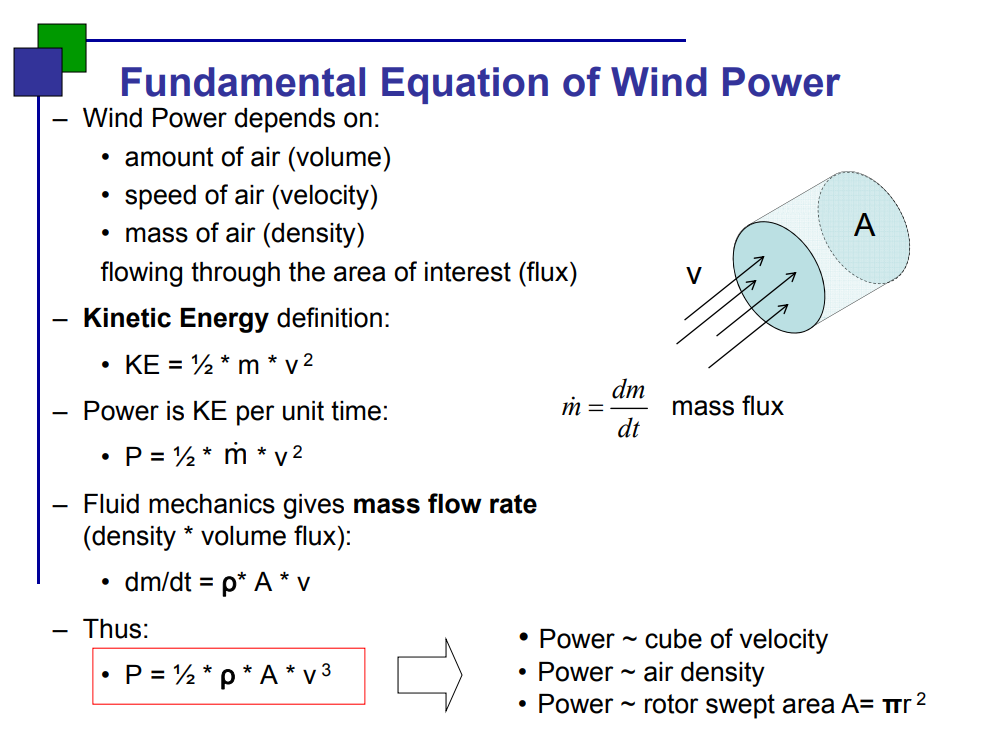

Image credits: http://web.mit.edu/windenergy/windweek/Presentations/Wind%20Energy%20101.pdf

In [57]:
# Focusing only the first model of wind turbine
R80721_data = data_df.loc[data_df['Wind_turbine_name'] =='R80721'].copy()
R80721_data.head()

,Wind_turbine_name,Date_time,Ba_avg,Ba_min,Ba_max,Ba_std,Rt_avg,Rt_min,Rt_max,Rt_std,...,Pas_max,Pas_std,Wa_c_avg,Wa_c_min,Wa_c_max,Wa_c_std,Na_c_avg,Na_c_min,Na_c_max,Na_c_std
0,R80721,2017-02-08 07:00:00,44.990002,44.990002,44.990002,0.0,14.0,14.0,14.0,0.0,...,NaN,NaN,358.04999,NaN,NaN,NaN,358.04999,NaN,NaN,NaN
1,R80721,2017-01-26 01:40:00,-1.000000,-1.000000,-1.000000,0.0,10.0,10.0,10.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,R80721,2017-01-26 12:50:00,-1.000000,-1.000000,-1.000000,0.0,10.0,10.0,10.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,R80721,2017-01-26 14:00:00,-1.000000,-1.000000,-1.000000,0.0,10.0,10.0,10.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,R80721,2017-02-18 00:10:00,44.990002,44.990002,44.990002,0.0,17.0,17.0,17.0,0.0,...,NaN,NaN,7.99000,NaN,NaN,NaN,7.99000,NaN,NaN,NaN


In [58]:
# Reindexing based on time
R80721_data.reset_index(drop=True, inplace=True)
R80721_data = R80721_data.drop_duplicates(subset=['Date_time'],keep='first')
R80721_data = R80721_data.set_index('Date_time')
R80721_data = R80721_data.sort_index()
R80721_data.head()

,Wind_turbine_name,Ba_avg,Ba_min,Ba_max,Ba_std,Rt_avg,Rt_min,Rt_max,Rt_std,DCs_avg,...,Pas_max,Pas_std,Wa_c_avg,Wa_c_min,Wa_c_max,Wa_c_std,Na_c_avg,Na_c_min,Na_c_max,Na_c_std
Date_time,,,,,,,,,,,,,,,,,,,,,
2016-12-31 23:00:00,R80721,91.529999,91.529999,91.529999,0.0,12.21,12.0,13.0,0.38,3.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-31 23:10:00,R80721,91.529999,91.529999,91.529999,0.0,11.73,11.0,12.0,0.40,3.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-31 23:20:00,R80721,91.529999,91.529999,91.529999,0.0,11.26,11.0,12.0,0.41,3.76,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-31 23:30:00,R80721,91.529999,91.529999,91.529999,0.0,11.82,11.0,12.0,0.37,3.77,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-31 23:40:00,R80721,91.529999,91.529999,91.529999,0.0,12.00,12.0,12.0,0.00,3.83,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
R80721_data.drop(columns=['Wind_turbine_name'], inplace=True)
R80721_data.dtypes

Ba_avg      float64
Ba_min      float64
Ba_max      float64
Ba_std      float64
Rt_avg      float64
             ...   
Wa_c_std    float64
Na_c_avg    float64
Na_c_min    float64
Na_c_max    float64
Na_c_std    float64
Length: 136, dtype: object

In [73]:
R80721_power_wind = R80721_data[['P_avg', 'Ws_avg']].copy()
R80721_power_wind['P_avg'] = R80721_power_wind['P_avg'] * 1000 
R80721_power_wind = R80721_power_wind.sort_index()
R80721_power_wind.dropna(inplace=True)
R80721_power_wind.head()

,P_avg,Ws_avg
Date_time,,
2016-12-31 23:00:00,-5800.0002,3.23
2016-12-31 23:10:00,-5760.0002,3.45
2016-12-31 23:20:00,-2819.9999,3.53
2016-12-31 23:30:00,-2300.0000,3.84
2016-12-31 23:40:00,-3150.0001,3.93


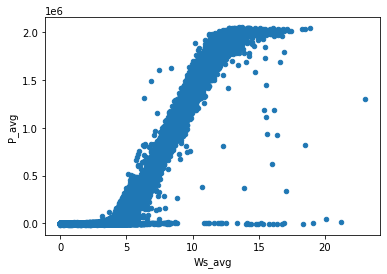

In [74]:
R80721_power_wind.plot(x='Ws_avg', y='P_avg', kind='scatter')

In [64]:
# Trying out linear regressor approach
import tensorflow as tf

In [66]:
from sklearn.linear_model import LinearRegression

In [75]:
X = R80721_power_wind['Ws_avg'].values.reshape(-1, 1)
y = R80721_power_wind['P_avg'].values

In [76]:
reg = LinearRegression().fit(X, y)
reg.score(X, y)

0.7912066100410103

In [77]:
reg.coef_

array([146563.90412961])

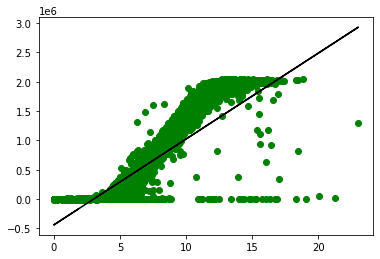

In [80]:
plt.scatter(X, y,color='g')
plt.plot(X, reg.predict(X),color='k')
plt.show()